In [3]:
import matplotlib.pyplot as plt
import cv2
from img_manager import *

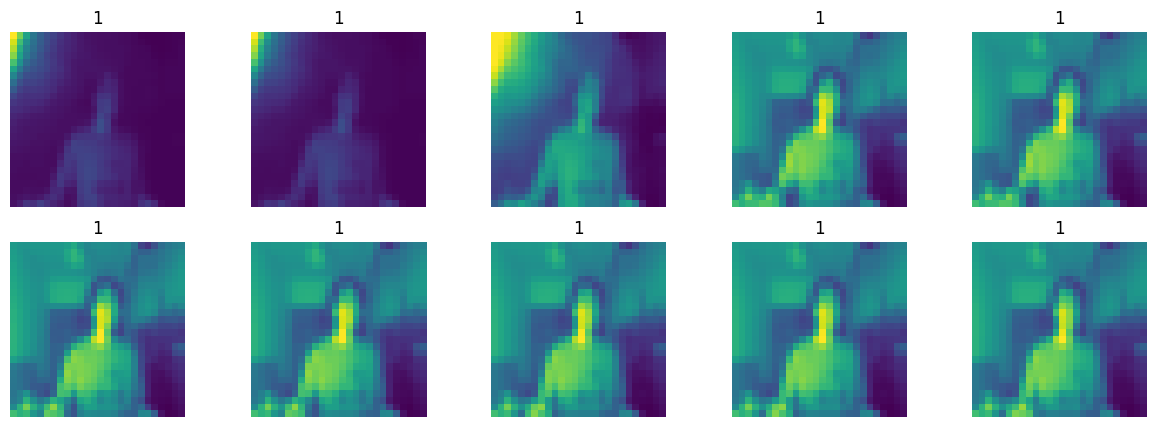

In [4]:
DIR = 'img/train/THuman/'
images, labels = load_data(DIR)


plt.figure(figsize=(15, 5))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.axis('off')
    plt.title(labels[i])
    plt.imshow(images[i])
plt.show()

In [ ]:
cv2.imread("img/test/T_Humna232.png").shape

(480, 640, 3)